# Compute and fit a calibration laser map

## Run the computation of the calibration laser map from a laser cube

Excerpt of a calibration laser jobfile
```
WAVENUMBER 1
WAVE_CALIB 1
APOD 1.0
COMPARISON data/ar42/19aq65/2384729c.fits
COMPARISON data/ar42/19aq65/2384730c.fits
COMPARISON data/ar42/19aq65/2384731c.fits
COMPARISON data/ar42/19aq65/2384732c.fits
COMPARISON data/ar42/19aq65/2384733c.fits
COMPARISON data/ar42/19aq65/2384734c.fits
COMPARISON data/ar42/19aq65/2384735c.fits
```

Command

```
orbs sitelle laser.job start --laser
```

## Check the output

Calibration laser map should be written as a fits file named `LASER_None.cam1.calibration_laser_map.fits`.

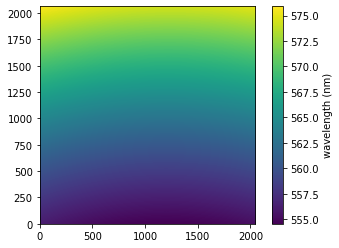

In [13]:
import pylab as pl
import astropy.io.fits as pyfits
import orb.utils.spectrum
import orb.core
import logging
logging.getLogger().setLevel(logging.INFO)

calib = pyfits.getdata('/reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fits')
pl.imshow(calib, origin='bottom')
cb = pl.colorbar()
cb.set_label('wavelength (nm)')

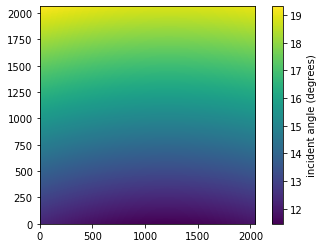

In [11]:
# compute the incident angle amp
calib_laser_nm = orb.core.Tools(instrument='sitelle').config.CALIB_NM_LASER # laser wavelength

theta = orb.utils.spectrum.corr2theta(calib / calib_laser_nm)
pl.imshow(theta, origin='bottom')
cb = pl.colorbar()
cb.set_label('incident angle (degrees)')

## Fit calibration laser map

It can be computed with the command

```bash
orbs-fit-calibration-laser-map sitelle LASER_None.cam1.calibration_laser_map.fits
```

The outputs are a set of model parameters like
```
distance to mirror: 23.612137624011666 cm 
X angle from the optical axis to the center: -0.6610194454074676 degrees
Y angle from the optical axis to the center: 15.175851731290397 degrees
Tip-tilt angle of the detector along X: -0.9076138835670099 degrees
Tip-tilt angle of the detector along Y: 0.2760639345353841 degrees
Rotation angle of the detector: 0.0 degrees (Fixed)
Calibration laser wavelength: 543.5 nm (Fixed)
Error on fit: mean -3.5682810289583247e-07, std 0.001983757565397856 (in nm)
Error on fit: mean -0.00019696123434912558, std 1.0949903764845572 (in km/s)
```

Parameter | Typical value
----------| -------------
distance to mirror | 23 cm
X angle | < 1 degree
Y angle | 15.5 degree
Tip angle | < 1 degree 
Tilt angle | < 1 degree


<img src="coords0.svg" alt="drawing" width="500"/>


And a set of files
```
LASER_None.cam1.calibration_laser_map.fit.fits in 0.84 s # the fitted calibration laser map (model + wavefront)
LASER_None.cam1.calibration_laser_map.fit.residual.fits in 0.14 s # the residual
LASER_None.cam1.calibration_laser_map.fit.model.fits in 0.17 s # the map computed from the model
LASER_None.cam1.calibration_laser_map.fit.wavefront.fits in 0.17 s # the wavefront error
```
The complete modelization of the calibration laser map includes an optical model + a wavefront error map, i.e:

```
observed_map = model + wavefront + residual
```


Text(0.5, 1.0, 'Optical model')

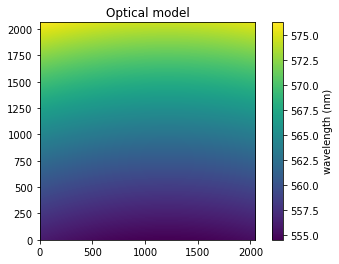

In [24]:
model = pyfits.getdata('/reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fit.model.fits')
pl.imshow(model, origin='bottom')
cb = pl.colorbar()
cb.set_label('wavelength (nm)')
pl.title('Optical model')

Text(0.5, 1.0, 'Wavefront error only (Zernike polynomials)')

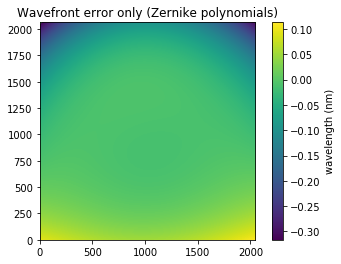

In [25]:
wf = pyfits.getdata('/reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fit.wavefront.fits')
pl.imshow(wf, origin='bottom')
cb = pl.colorbar()
cb.set_label('wavelength (nm)')
pl.title('Wavefront error only (Zernike polynomials)')

Text(0.5, 1.0, 'fitted map = optical model + wavefront error')

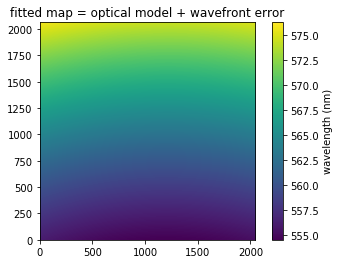

In [26]:
calibfit = pyfits.getdata('/reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fit.fits')
pl.imshow(calibfit, origin='bottom')
cb = pl.colorbar()
cb.set_label('wavelength (nm)')
pl.title('fitted map = optical model + wavefront error')

Text(0.5, 1.0, 'Residual')

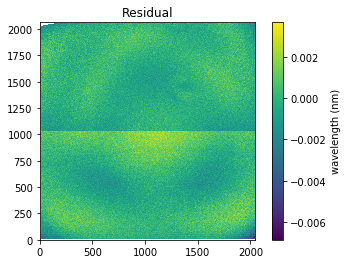

In [27]:
res = pyfits.getdata('/reductions2/sitelle/M95/SN1/laser/LASER_None.cam1.calibration_laser_map.fit.residual.fits')
pl.imshow(res, origin='bottom')
cb = pl.colorbar()
cb.set_label('wavelength (nm)')
pl.title('Residual')